**Try Linear Regression just using numpy (Without Tensorflow/Pytorch or other torch library). You can optionally use sklearn (if you want)**

In [18]:
import numpy as np

In [19]:
# Input (temp, rainfall, humidity)

inputs = np.array( [[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32' )


# Targets (apples)
# Only for apples

targets = np.array( [[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32' )

In [20]:
m = np.mean( inputs, 0 )
print( "Mean :- ", m )

std_dev = np.std( inputs, 0 )
print( "\n\nStandard deviation :- ", std_dev )

# Normalizing the input
x = (inputs - m)/std_dev
x = np.hstack( ( np.ones((targets.size, 1)), x ) )
print( "\n\nx :- \n", x )


Mean :-  [84.4 85.6 54.4]


Standard deviation :-  [12.059851 30.388155 12.499599]


x :- 
 [[ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]
 [ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]
 [ 1.         -0.94528544 -0.61208057 -0.91202933]
 [ 1.          0.54727036  0.07897819  0.7680245 ]
 [ 1.          0.21559127  1.59272587  0.28800911]
 [ 1.          1.45938778 -1.40186191 -1.39204478]
 [ 1.         -1.27696455  0.34223866  1.24803984]]


Linear Regression Model (from scratch)

The weights and biases can also be represented as matrices, initialized with random values. The first row of w and the first element of b are use to predict the first target variable i.e. yield for apples, and similarly the second for oranges.

In [21]:
# Weights and biases

rg = np.random.default_rng(67)
w = rg.random((1, 4))

print(w)

[[0.4143315  0.1269383  0.51398504 0.29724262]]


In [22]:
# MSE loss function

def mse_loss( actual, predicted ):
    diff = actual - predicted
    return np.sum( diff*diff )/diff.size

In [23]:
# Define the model

def predict( x, w ):
    return (x @ w.T)


# Compute error

preds = predict( x, w )
cost_initial = mse_loss( preds, targets )
print( "Before regression cost is :- ", cost_initial )

Before regression cost is :-  6880.732142712293


In [24]:
def gradient_descent( X, y, w, learning_rate, epochs ):
    history = np.zeros((epochs, 1))
    for i in range(epochs):
        h = predict( X, w )
        diff = h - y
        delta = ( learning_rate/targets.size )*( X.T@diff )
        new_w = w - delta.T
        w = new_w
        history[i] = mse_loss(h, y)
        print( "loss {} iteration {}".format( history[i], i ) )
    return ( history, w )

In [25]:
import matplotlib.pyplot as plt

epochs = 250
learning_rate = 0.01

initial_cost = mse_loss( predict(x, w), targets )

print("Initial cost is :- ", initial_cost, "\n")

( history, optimal_params ) = gradient_descent( x, targets, w, learning_rate, epochs )

print("Optimal parameters are :- \n", optimal_params, "\n")

print("Final cost is :- ", history[-1])

Initial cost is :-  6880.732142712293 

loss [6880.73214271] iteration 0
loss [6724.60112284] iteration 1
loss [6572.35813299] iteration 2
loss [6423.89486164] iteration 3
loss [6279.10637188] iteration 4
loss [6137.89098626] iteration 5
loss [6000.15017585] iteration 6
loss [5865.7884533] iteration 7
loss [5734.71326978] iteration 8
loss [5606.83491564] iteration 9
loss [5482.06642465] iteration 10
loss [5360.32348171] iteration 11
loss [5241.52433387] iteration 12
loss [5125.58970449] iteration 13
loss [5012.4427106] iteration 14
loss [4902.00878311] iteration 15
loss [4794.2155899] iteration 16
loss [4688.99296168] iteration 17
loss [4586.27282047] iteration 18
loss [4485.98911064] iteration 19
loss [4388.07773237] iteration 20
loss [4292.47647749] iteration 21
loss [4199.12496758] iteration 22
loss [4107.96459427] iteration 23
loss [4018.93846162] iteration 24
loss [3931.99133058] iteration 25
loss [3847.06956529] iteration 26
loss [3764.12108142] iteration 27
loss [3683.09529617] 

Adjust Weights using Gradints

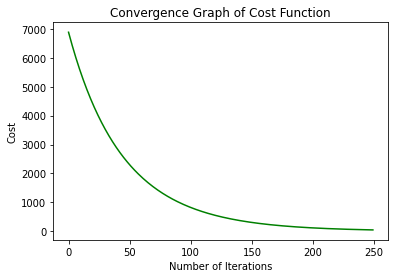

In [26]:
import matplotlib.pyplot as plt


plt.plot( range(len(history)), history, 'g' )
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [27]:
# Calculate error
preds = predict( x, optimal_params )
cost_final = mse_loss( preds, targets )

# Print predictions
print("Prediction :- \n",preds)

# Comparing predicted with targets
print("\n\nTargets :- \n", targets)

Prediction :- 
 [[ 50.28234288]
 [ 78.50221614]
 [106.90150188]
 [ 15.6594557 ]
 [ 98.93911454]
 [ 50.28234288]
 [ 78.50221614]
 [106.90150188]
 [ 15.6594557 ]
 [ 98.93911454]
 [ 50.28234288]
 [ 78.50221614]
 [106.90150188]
 [ 15.6594557 ]
 [ 98.93911454]]


Targets :- 
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [28]:
print("Cost after linear regression = ", cost_final )
print("Cost reduction = {} %".format(((cost_initial- cost_final) / cost_initial) * 100))

Cost after linear regression =  48.39949535466636
Cost reduction = 99.29659381660528 %
